<a href="https://colab.research.google.com/github/Yewon-dev/boostcamp-AI-Tech/blob/master/TIL/%5BPython%5DMatplotlib_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Bar plot
- 직사각형 막대를 이용하여 데이터의 값을 표현 = 막대그래프
- `.bar()` : 기본 bar plot
- `.barh()` : horizontal bar plot

> **Principle of Proportion Ink** \
> The representation of numbers, as physically measured on the surface of the graphic itself, should be directly proportional to the numerical quantities represented.


## Bar plot의 종류

### 1. Stacked Bar Plot
*   2개 이상의 그룹을 쌓아서 표현
*   `.bar()`에서는 `bottom`를,
*   `.barh()`에서는 `left`를 사용하며 밑의 그룹 지정
*   **Percentage Stacked Bar** : 각각의 범주에 대해 비율 표시

### 2. Overlapped Bar Plot
*   2개의 그룹을 겹쳐서 표현
*   3개 이상의 그룹은 **Area plot**

### 3. Grouped Bar Plot
*   그룹별 범주에 따라 bar을 이웃되게 배치












-----

## Practice w/ dataset
- feature에 대한 정보는 `head()`, `describe()`, `info()` 등으로 확인

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [29]:
student = pd.read_csv('./StudentsPerformance.csv')
student.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
796,male,group D,high school,standard,none,70,70,70
520,male,group D,some college,standard,none,71,49,52
556,female,group C,associate's degree,standard,completed,55,72,79
533,female,group E,associate's degree,standard,completed,79,88,94
215,male,group B,some high school,standard,completed,84,83,75


In [30]:
# Dtype 과 null 값이 있는지 확인
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [31]:
# 통계정보 확인
student.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [32]:
group = student.groupby('gender')['race/ethnicity'].value_counts().sort_index()
display(group)
print(student['gender'].value_counts())

gender  race/ethnicity
female  group A            36
        group B           104
        group C           180
        group D           129
        group E            69
male    group A            53
        group B            86
        group C           139
        group D           133
        group E            71
Name: race/ethnicity, dtype: int64

female    518
male      482
Name: gender, dtype: int64


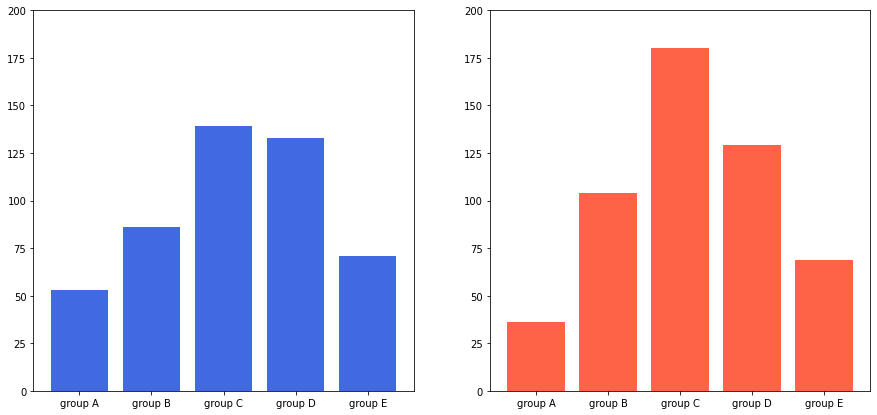

In [33]:
# Multiple Bar Plot
group = student.groupby('gender')['race/ethnicity'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], color='tomato')

for ax in axes:
    ax.set_ylim(0, 200)
    
plt.show()


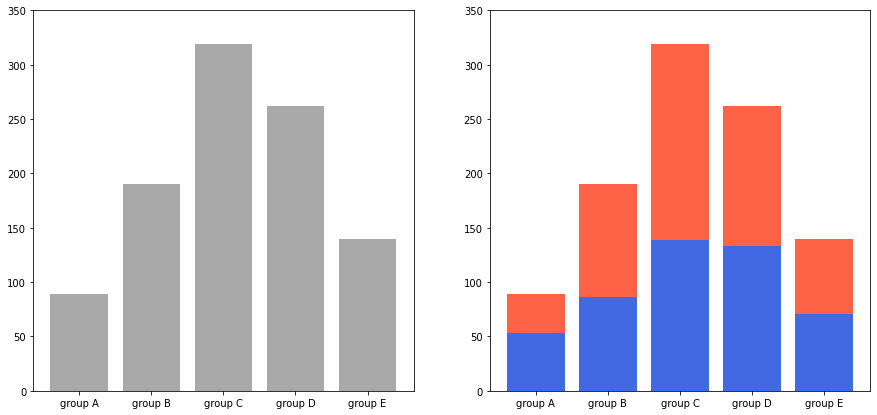

In [34]:
# Stacked Bar Plot
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

group_cnt = student['race/ethnicity'].value_counts().sort_index()
axes[0].bar(group_cnt.index, group_cnt, color='darkgray')
axes[1].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], bottom=group['male'], color='tomato')

for ax in axes:
    ax.set_ylim(0, 350)
    
plt.show()

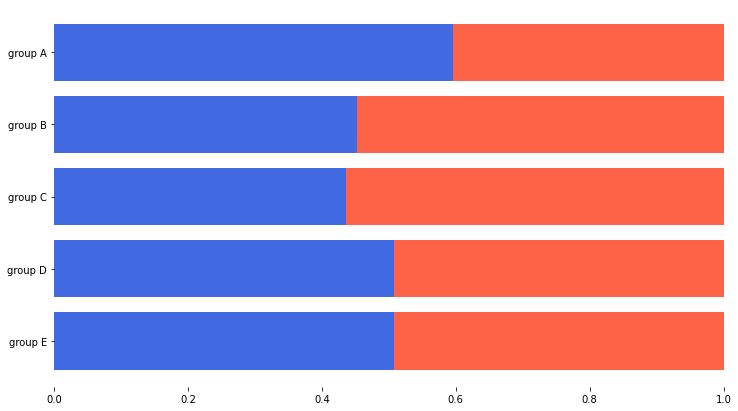

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

group = group.sort_index(ascending=False) # 역순 정렬
total=group['male']+group['female'] # 각 그룹별 합


ax.barh(group['male'].index, group['male']/total, 
        color='royalblue')

ax.barh(group['female'].index, group['female']/total, 
        left=group['male']/total, 
        color='tomato')

ax.set_xlim(0, 1)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

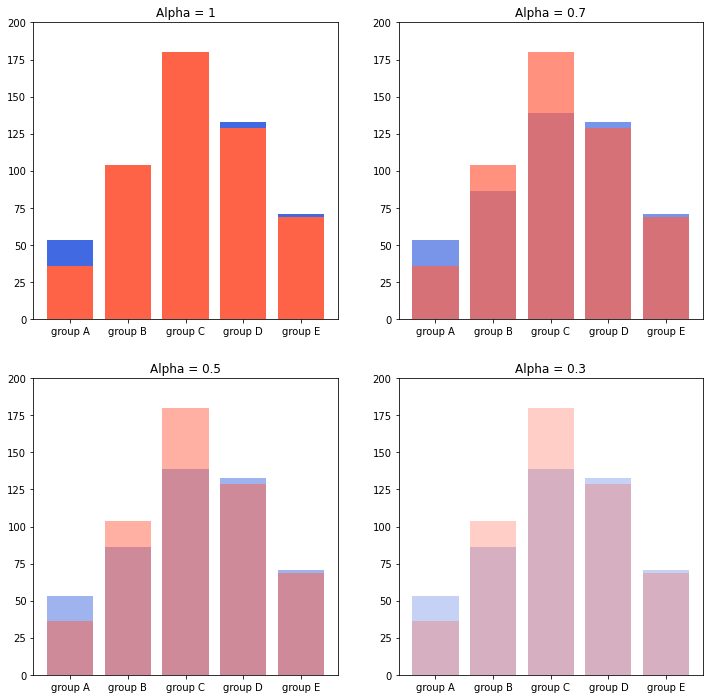

In [36]:
group = group.sort_index() # 다시 정렬

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

for idx, alpha in enumerate([1, 0.7, 0.5, 0.3]):
    axes[idx].bar(group['male'].index, group['male'], 
                  color='royalblue', 
                  alpha=alpha)
    axes[idx].bar(group['female'].index, group['female'],
                  color='tomato',
                  alpha=alpha)
    axes[idx].set_title(f'Alpha = {alpha}')
    
for ax in axes:
    ax.set_ylim(0, 200)
    
    
plt.show()

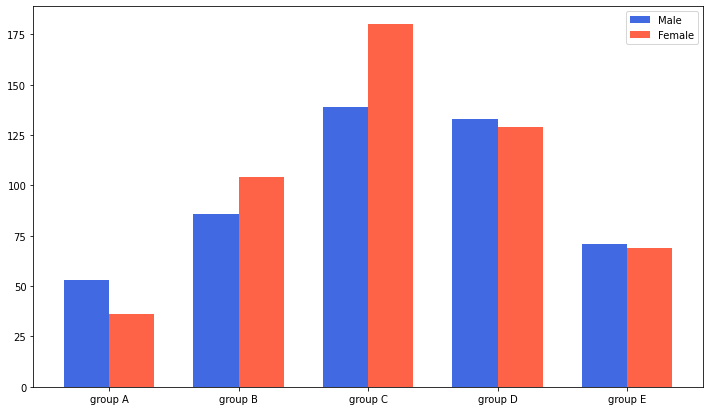

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

idx = np.arange(len(group['male'].index))
width=0.35

ax.bar(idx-width/2, group['male'], 
       color='royalblue',
       width=width, label='Male')

ax.bar(idx+width/2, group['female'], 
       color='tomato',
       width=width, label='Female')

ax.set_xticks(idx)
ax.set_xticklabels(group['male'].index)
ax.legend()    
    
plt.show()

------


# 2. Line plot

- `.plot()`
- 연속적으로 변화하는 값을 순서대로 점으로 나타내고, 이를 선으로 연결한 그래프
- 시계열 분석에 특화됨
- noise를 줄여주는 `smoothing` 사용

**Tips.**
1. 추세에 집중
  - 너무 생략되지 않는 선에서 범위를 조정하여 변화율 관찰
2. 간격
  - 데이터의 간격을 일정하지 않다면 관측 값에 점으로라도 표시
3. 보간
  - Moving Average / Smooth Curve with Scipy
  - 좋은 방법일 수 있으나 일반적인 분석에서는 지양
  - [참고 링크](https://www.delftstack.com/howto/matplotlib/matplotlib-plot-smooth-curve/)
4. 이중 축(double axis) 사용
  - `.twinx()` : 같은 시간에 대한 다른 종류의 데이터
  - `.secondary_xaxis()`, `.scondary_yaxis()` : 한 데이터에 대해 다른 단위



### Line Plot 실습

- 기본 line plot

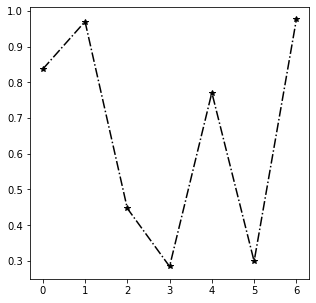

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

np.random.seed(97)
x = np.arange(7)
y = np.random.rand(7)

ax.plot(x, y,
        color='black',
        marker='*',
        linestyle='-.', 
       )

plt.show()

- 범례 대신 text로 가독성을 높임

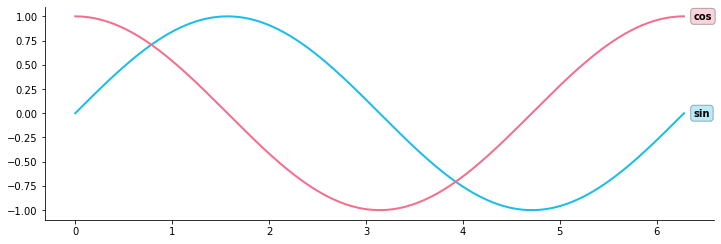

In [8]:
fig = plt.figure(figsize=(12, 5))

x = np.linspace(0, 2*np.pi, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

# Ax2
ax = fig.add_subplot(111, aspect=1)
ax.plot(x, y1,
       color='#1ABDE9',
       linewidth=2,)

ax.plot(x, y2,
       color='#F36E8E',
       linewidth=2,)

ax.text(x[-1]+0.1, y1[-1], s='sin', fontweight='bold',
         va='center', ha='left', 
         bbox=dict(boxstyle='round,pad=0.3', fc='#1ABDE9', ec='black', alpha=0.3))

ax.text(x[-1]+0.1, y2[-1], s='cos', fontweight='bold',
         va='center', ha='left', 
         bbox=dict(boxstyle='round,pad=0.3', fc='#F36E8E', ec='black', alpha=0.3))


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

-----

# 3. Scatter Plot

- `.scatter()`
- 점을 사용하여 두 feature간의 관계를 알기 위해 사용
- 다양한 variation 사용 가능 (색, 모양, 크기)
- 목적 : 양/음의 상관관계, cluster, gap in values, outliers 확인
- 점의 분포 파악
  - 투명도 조정
  - 지터링(jittering) : 점의 위치를 약간씩 변경
  - 2차원 히스토그램 : 히트맵 사용
  - contour plot : 분포를 등고선으로 표현

### Scatter Plot 실습

In [38]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

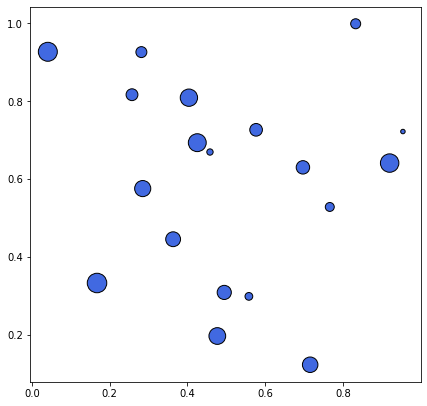

In [40]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, aspect=1)

np.random.seed(970725)

x = np.random.rand(20)
y = np.random.rand(20)
s = np.arange(20) * 20

ax.scatter(x, y, 
           s= s,
           c='royalblue',
           marker='o',
           linewidth=1,
           edgecolor='black')

plt.show()